# **Stock data and location**

**Using yfinance library**

In [1]:
import yfinance as yf

In [2]:
# create a Ticker object
t_object = yf.Ticker('AAPL') # for apple

In [3]:
# extract historical-date
historical_data = t_object.history(period = '1y')
print(f"Historical data :\n{historical_data}")

Historical data :
                                 Open        High         Low       Close  \
Date                                                                        
2024-05-17 00:00:00-04:00  188.627851  189.921802  188.299385  188.986176   
2024-05-20 00:00:00-04:00  188.448695  191.026635  188.130177  190.150726   
2024-05-21 00:00:00-04:00  190.200491  191.832856  190.031284  191.454636   
2024-05-22 00:00:00-04:00  191.375001  191.922444  189.384311  190.011368   
2024-05-23 00:00:00-04:00  190.091007  190.110918  185.761265  186.010101   
...                               ...         ...         ...         ...   
2025-05-12 00:00:00-04:00  210.970001  211.270004  206.750000  210.789993   
2025-05-13 00:00:00-04:00  210.429993  213.399994  209.000000  212.929993   
2025-05-14 00:00:00-04:00  212.429993  213.940002  210.580002  212.330002   
2025-05-15 00:00:00-04:00  210.949997  212.960007  209.539993  211.449997   
2025-05-16 00:00:00-04:00  212.360001  212.570007  209.770

In [4]:
# fetch company's financials
financials = t_object.financials
print(f"Financials :\n{financials}")

Financials :
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total E

In [5]:
# fetch financial actions
actions = t_object.actions
print(f"Actions :\n{actions}")

Actions :
                           Dividends  Stock Splits
Date                                              
1987-05-11 00:00:00-04:00   0.000536           0.0
1987-06-16 00:00:00-04:00   0.000000           2.0
1987-08-10 00:00:00-04:00   0.000536           0.0
1987-11-17 00:00:00-05:00   0.000714           0.0
1988-02-12 00:00:00-05:00   0.000714           0.0
...                              ...           ...
2024-05-10 00:00:00-04:00   0.250000           0.0
2024-08-12 00:00:00-04:00   0.250000           0.0
2024-11-08 00:00:00-05:00   0.250000           0.0
2025-02-10 00:00:00-05:00   0.250000           0.0
2025-05-12 00:00:00-04:00   0.260000           0.0

[92 rows x 2 columns]


### Get Complete information

In [12]:
information = t_object.info
for i,j in information.items():
    print(i,':',j)

address1 : One Apple Park Way
city : Cupertino
state : CA
zip : 95014
country : United States
phone : (408) 996-1010
website : https://www.apple.com
industry : Consumer Electronics
industryKey : consumer-electronics
industryDisp : Consumer Electronics
sector : Technology
sectorKey : technology
sectorDisp : Technology
longBusinessSummary : Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensi

### To access financial metrics

- **For location**

In [18]:
print(f"Location - {information['address1']}")
print(f"City - {information['city']}")
print(f"State - {information['state']}")
print(f"Zip - {information['zip']}")
print(f"Country - {information['country']}")

Location - One Apple Park Way
City - Cupertino
State - CA
Zip - 95014
Country - United States


- **For stock prices**
  - <u> Most recent stock price </u>
  - <u> Plot of stock prices variation in one year </u>

In [28]:
# for most recent stock prices
stocks = t_object.history(period = '1d') # last day recorded stock prices
print(f"Most recent stock price -\n{stocks.to_string()}")

Most recent stock price -
                                 Open        High         Low       Close    Volume  Dividends  Stock Splits
Date                                                                                                        
2025-05-16 00:00:00-04:00  212.360001  212.570007  209.770004  211.259995  53659100        0.0           0.0


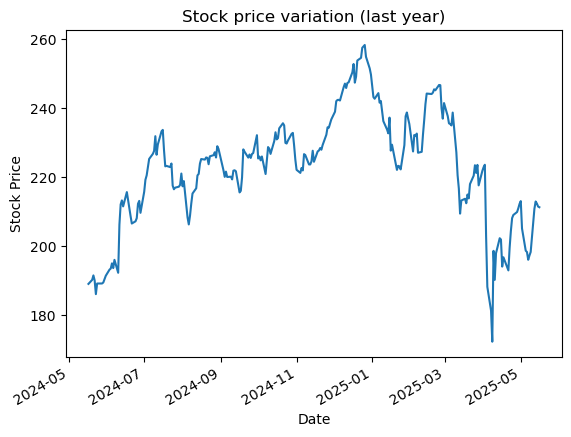

In [31]:
# for showing the plot for the variations of stock prices
import matplotlib.pyplot as plt
stocks = t_object.history(period = '1y')
stocks['Close'].plot(title = "Stock price variation (last year)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


## <b>Final Output</b>

In [48]:
import requests

def extract_ticker(company_name):
    url = f"https://query1.finance.yahoo.com/v1/finance/search?q={company_name}"
    # To avoid being blocked and be treated as a normal agent request
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    response = requests.get(url, headers = headers)
    # Go to quotes section of JSON to located the ticker symbol and shortname
    results = response.json().get("quotes", [])
    for i in results:
        if "symbol" in i and "shortname" in i:
            return i["symbol"]
    return None 
t = extract_ticker('Microsoft')
print(t)

MSFT


Location - One Apple Park Way
City - Cupertino
State - CA
Zip - 95014
Country - United States

----------------------------------------------------------------------------------------------------
Most recent stock data (Last day)

Date                         Open    High     Low    Close       Volume    Dividends    Stock Splits
-------------------------  ------  ------  ------  -------  -----------  -----------  --------------
2025-05-16 00:00:00-04:00  212.36  212.57  209.77   211.26  5.36591e+07            0               0 

----------------------------------------------------------------------------------------------------


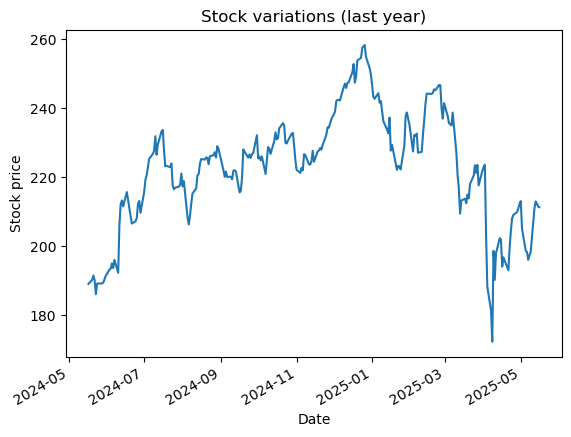

In [49]:
from tabulate import tabulate
# Display location information
print(f"Location - {information['address1']}")
print(f"City - {information['city']}")
print(f"State - {information['state']}")
print(f"Zip - {information['zip']}")
print(f"Country - {information['country']}\n")
print("-" * 100)
print('Most recent stock data (Last day)\n')
stock_mr = t_object.history(period = '1d')
print(tabulate(stock_mr, headers = 'keys', tablefmt = 'reST'),'\n')
print("-" * 100)
# display the last year's stock prices
stock_ly = t_object.history(period = '1y')
stock_ly['Close'].plot(title = "Stock variations (last year)")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.show()